<a href="https://colab.research.google.com/github/jwoel06/Notebooks/blob/main/breast_cancer_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Breast Cancer Diagnositics

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score

#Description

Description:

Breast cancer is the most prevalent cancer among women globally, representing 25% of all cancer diagnoses. In 2015 alone, it impacted over 2.1 million individuals. The disease originates when breast cells grow uncontrollably, often forming tumors that can be detected through X-rays or felt as lumps in the breast.

The main challenge in detecting breast cancer lies in classifying tumors as either malignant (cancerous) or benign (non-cancerous). Your task is to use machine learning, specifically Support Vector Machines (SVMs), to classify these tumors using the Breast Cancer Wisconsin (Diagnostic) Dataset.

Citation:
Wolberg, W., Mangasarian, O., Street, N., & Street, W. (1993). Breast Cancer Wisconsin (Diagnostic) [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5DW2B.

In [2]:
df = pd.read_csv('breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
#Check if any null values
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [4]:
# Set Diagnosis to Binary Numbers with Malignant (Cancer) is 1 and Benign (No Cancer) as 0
df["diagnosis"] = (df["diagnosis"] == "M").astype(int)

In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
cols = df.columns

In [7]:
cols

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

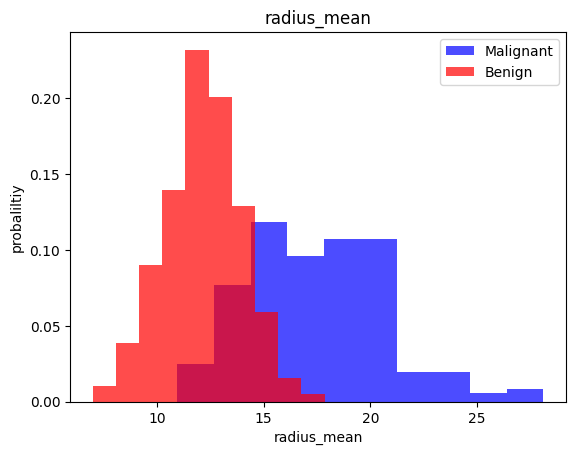

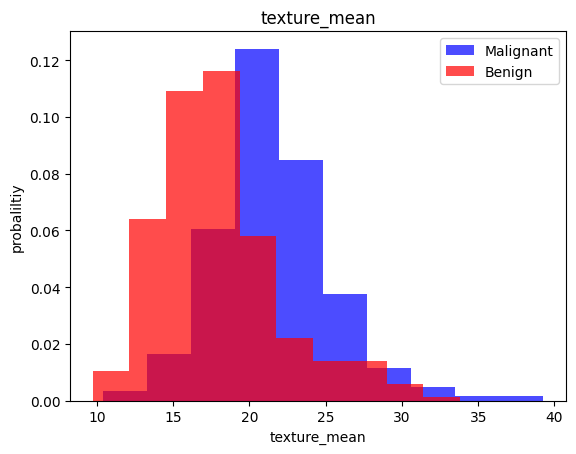

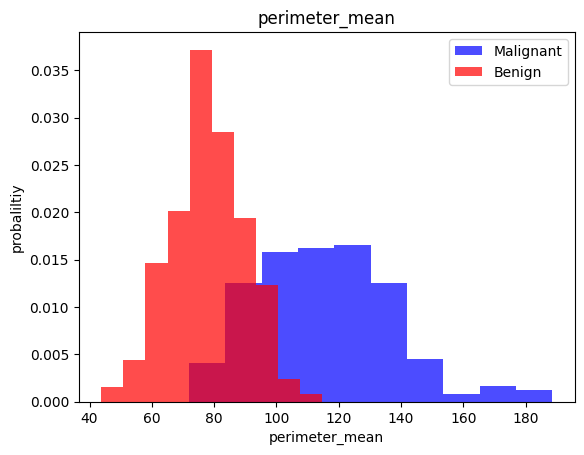

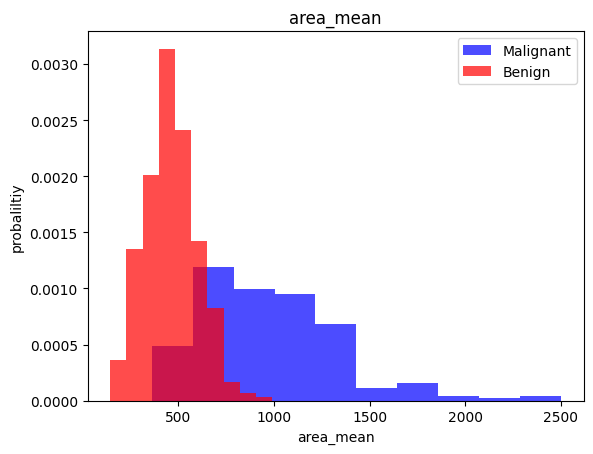

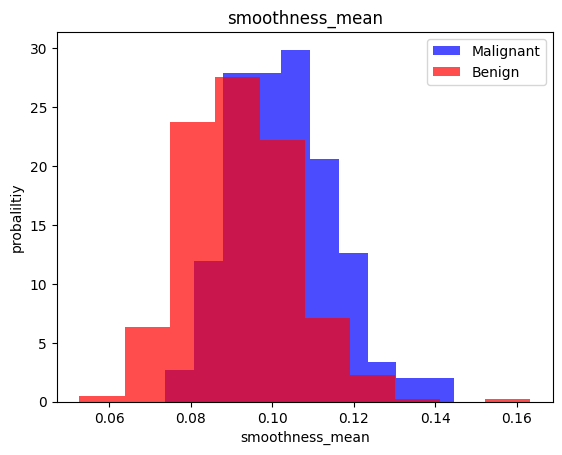

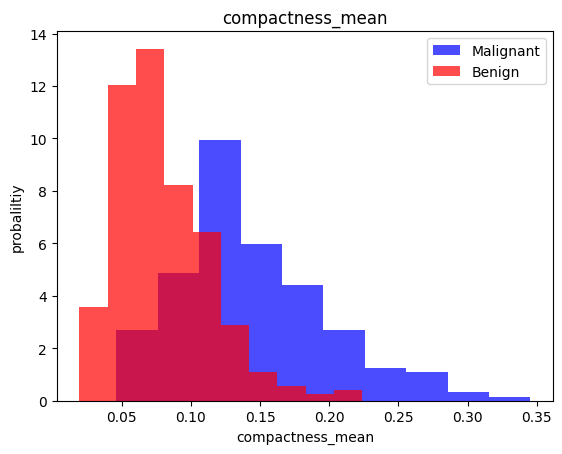

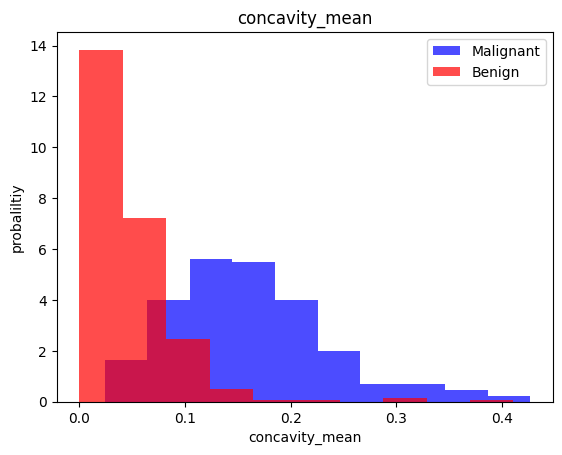

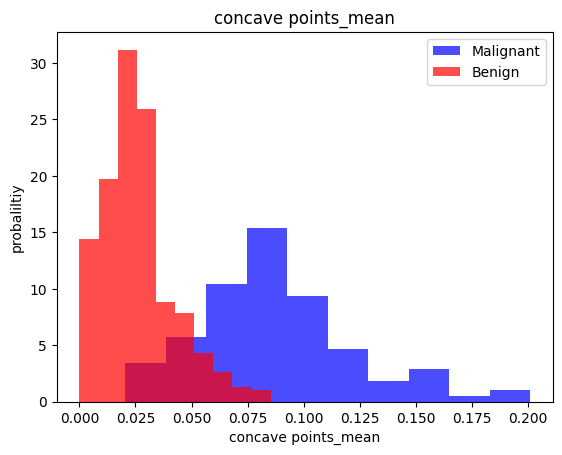

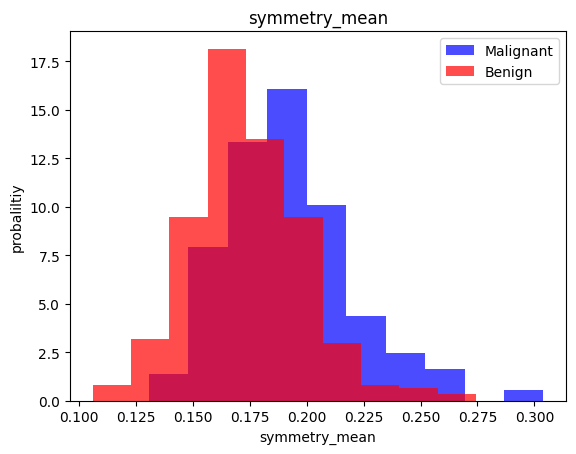

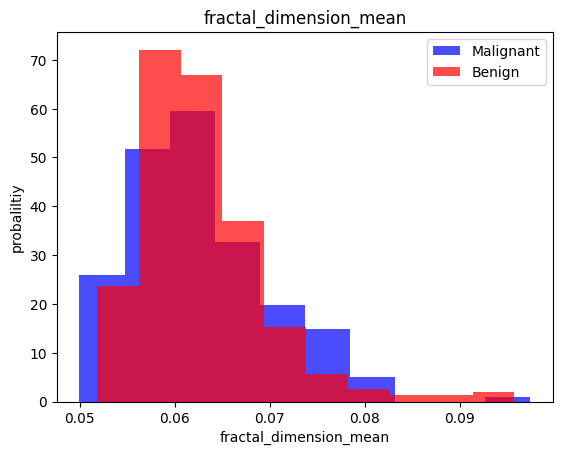

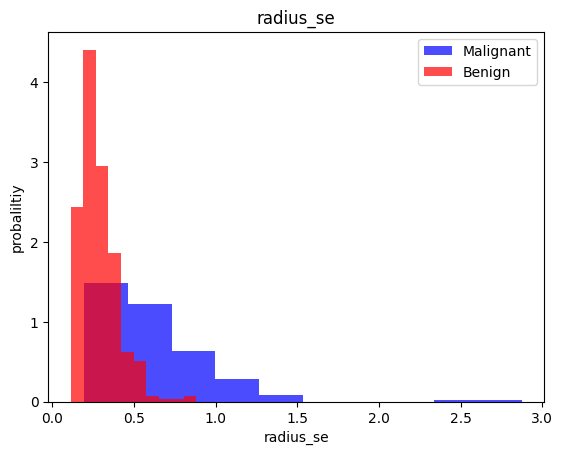

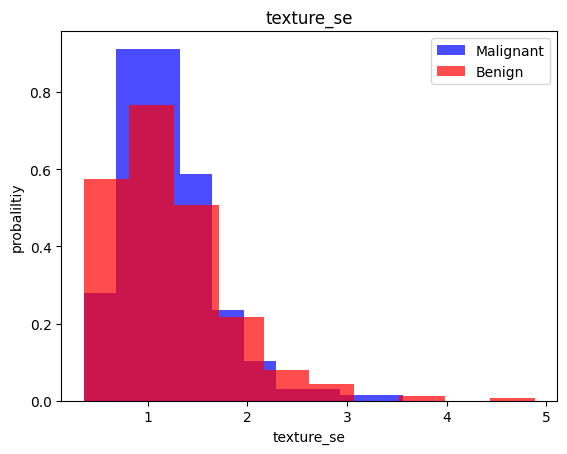

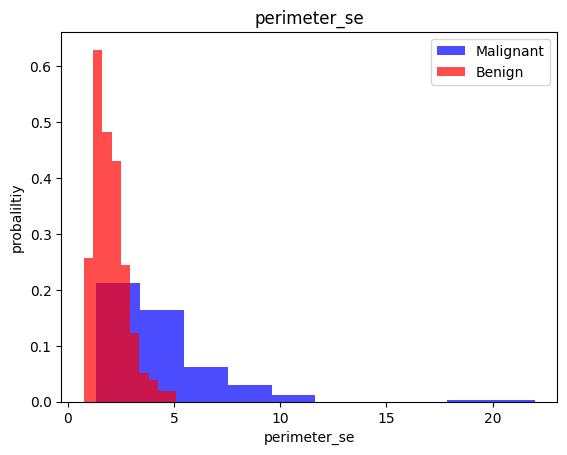

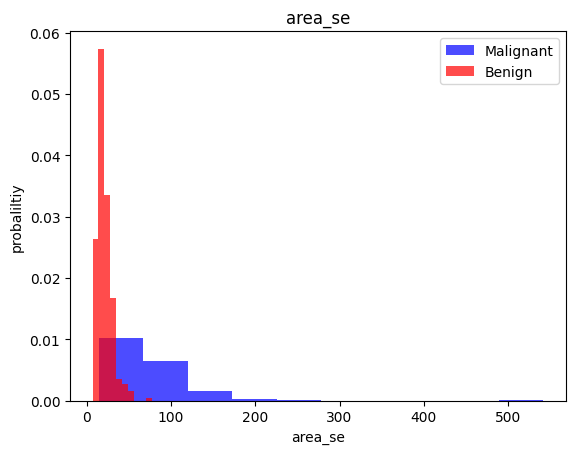

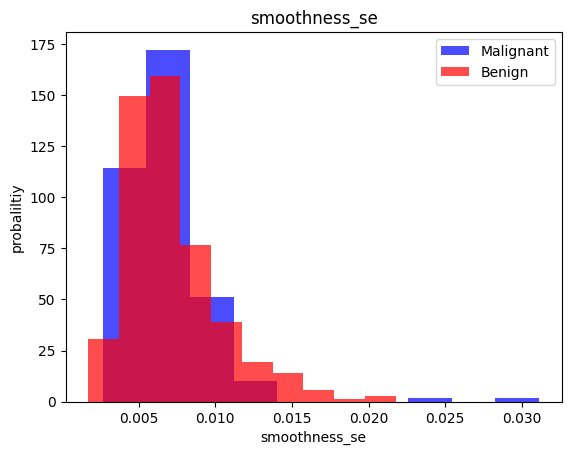

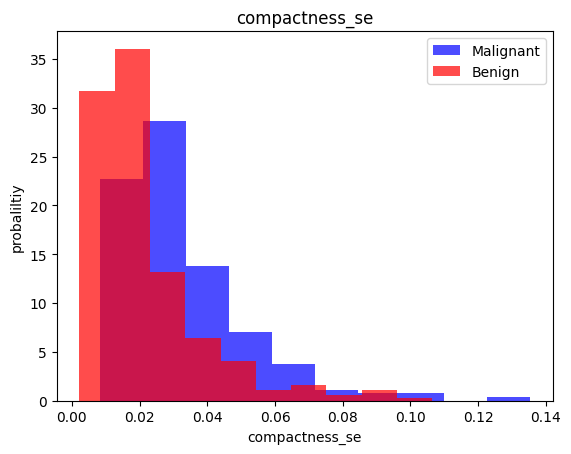

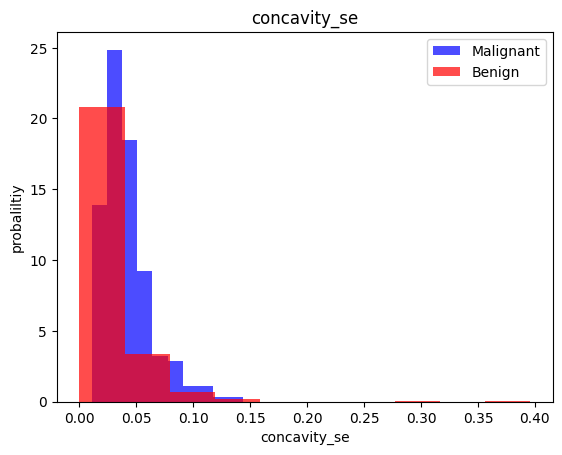

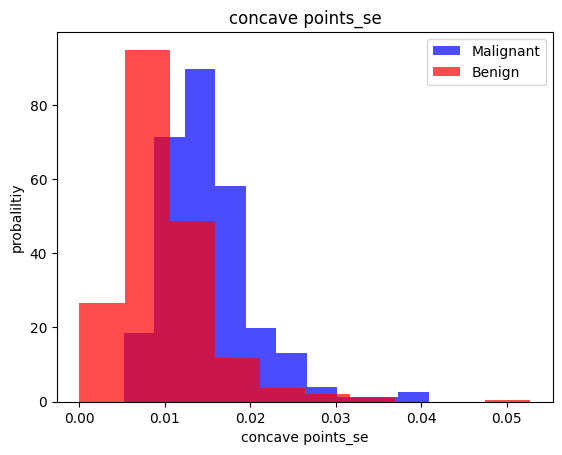

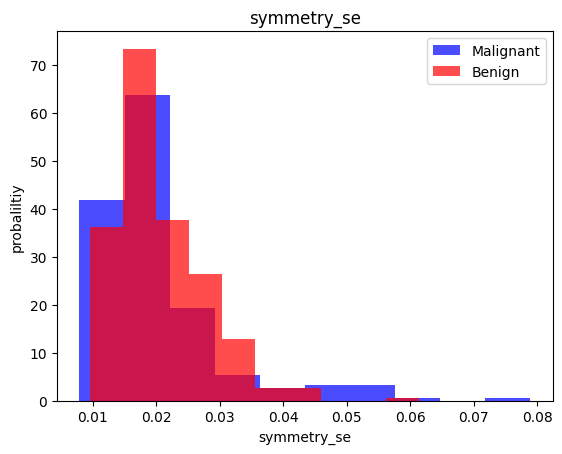

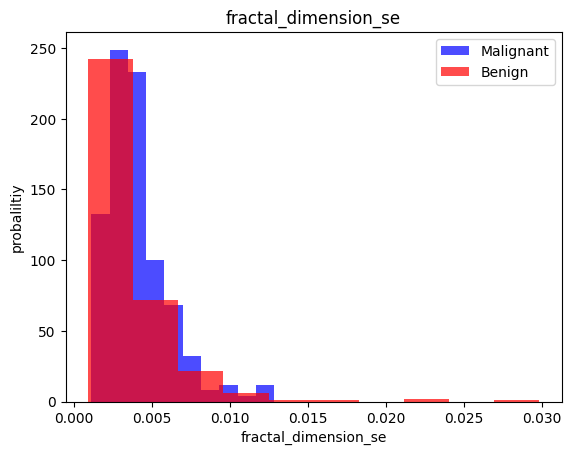

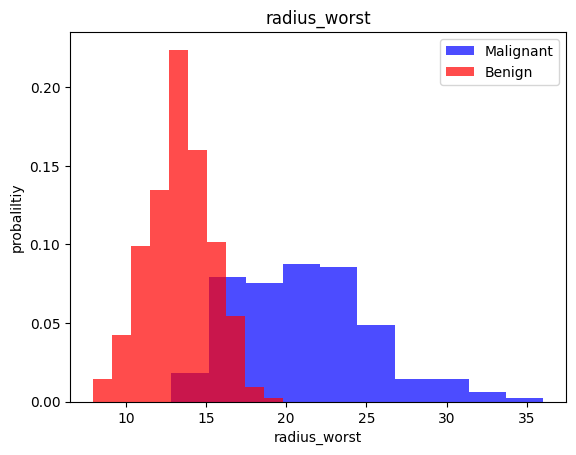

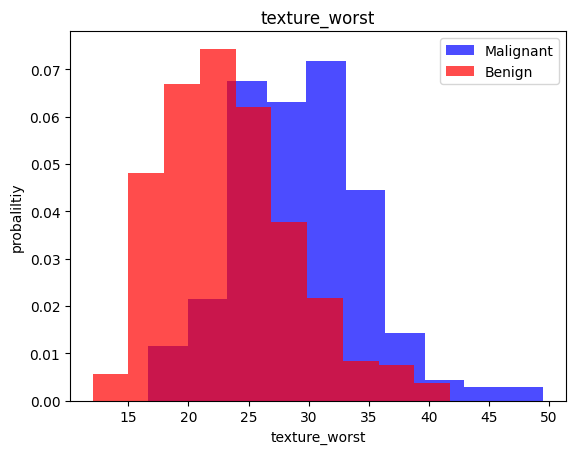

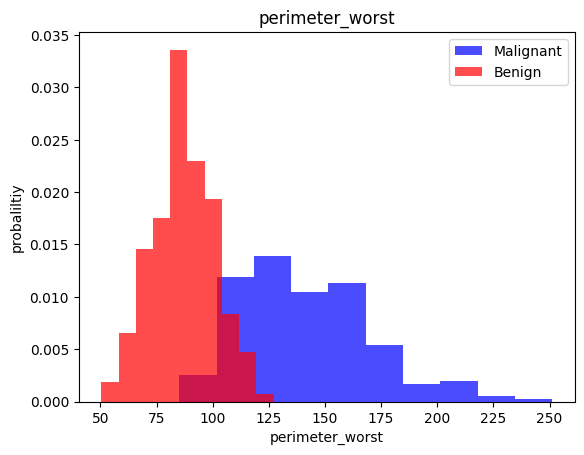

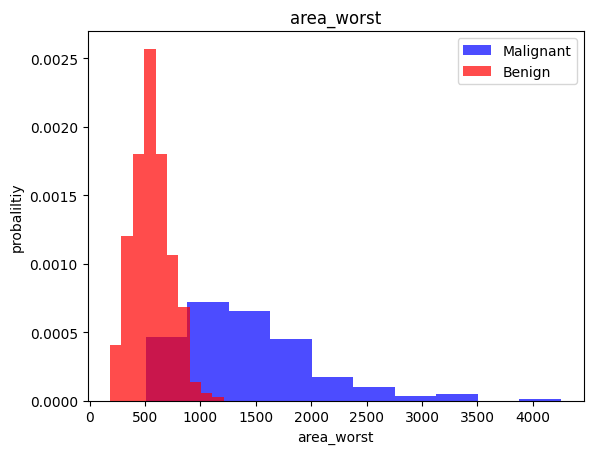

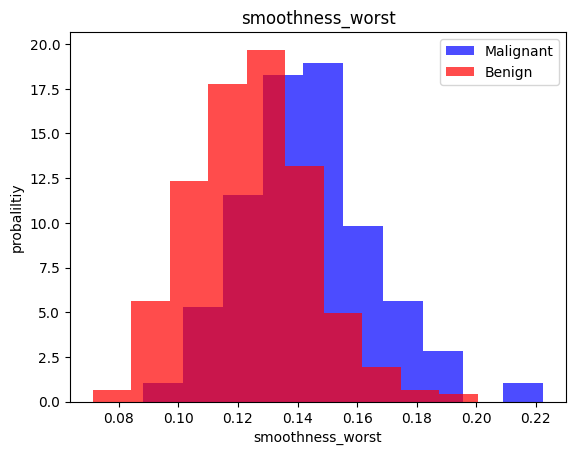

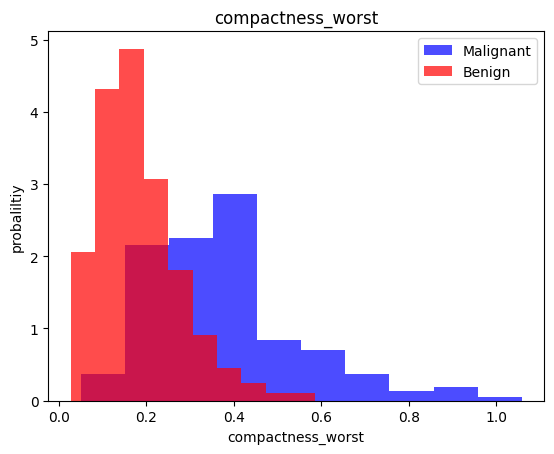

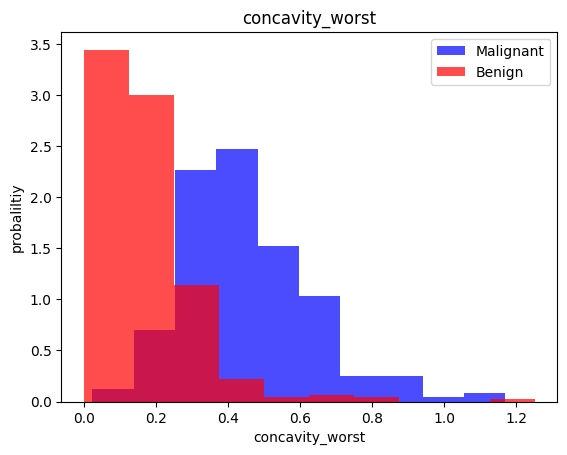

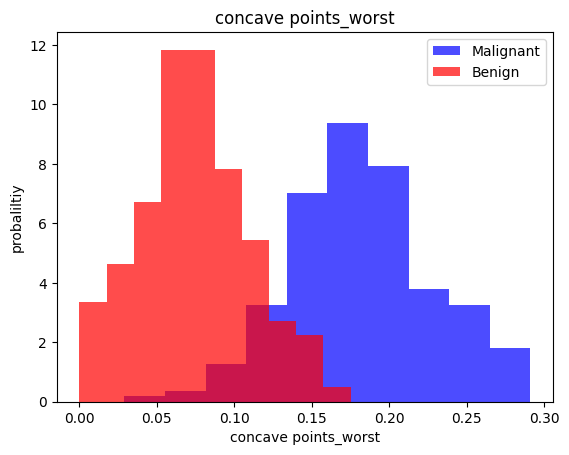

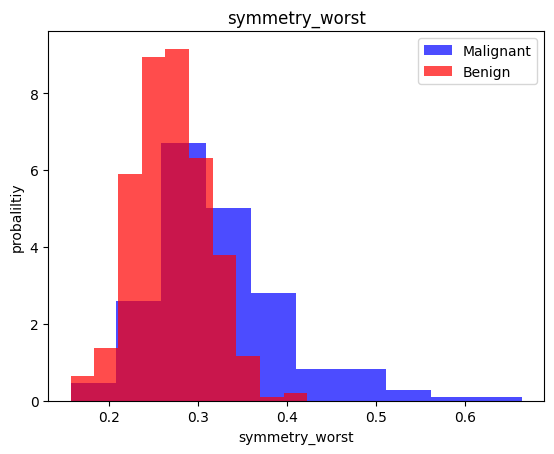

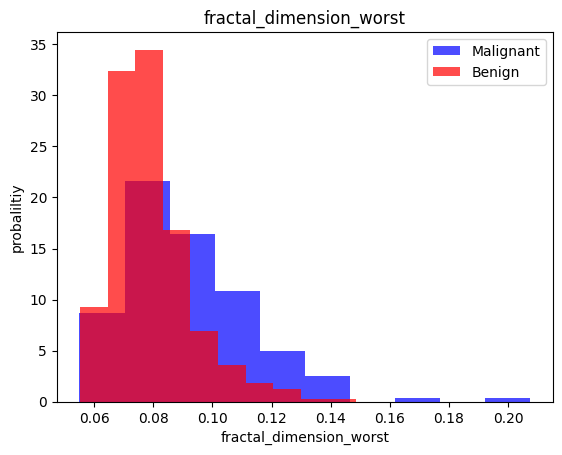

In [8]:
for label in cols[2:]:
  plt.hist(df[df["diagnosis"]==1][label], color='blue', label='Malignant', alpha=0.7, density = True)
  plt.hist(df[df["diagnosis"]==0][label], color='red', label='Benign', alpha=0.7, density = True)
  plt.title(label)
  plt.ylabel("probaliltiy")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [9]:
#Dropping all Standard Error columns
import re

In [10]:
for col in cols:
  if re.search("_se", col):
    df.drop(col, axis=1, inplace=True)

In [11]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

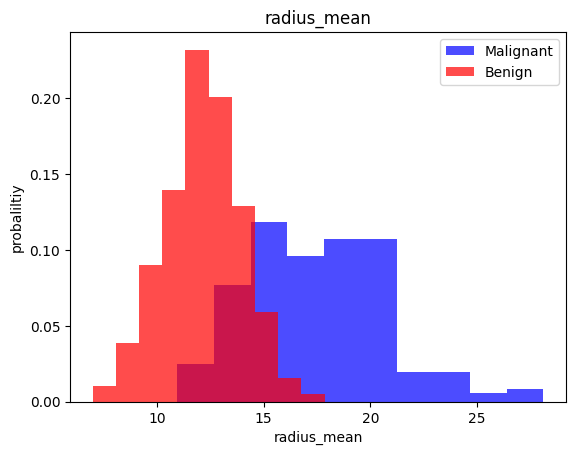

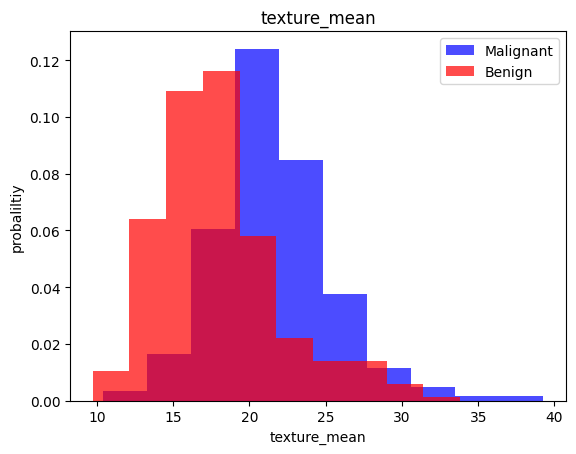

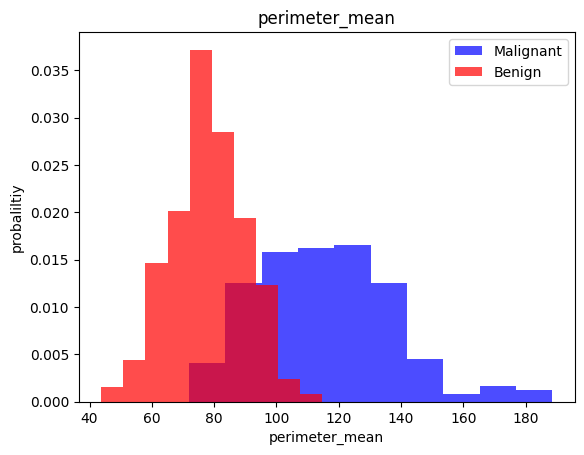

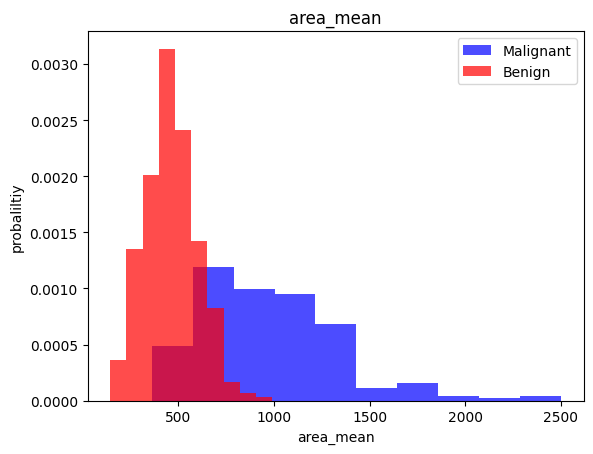

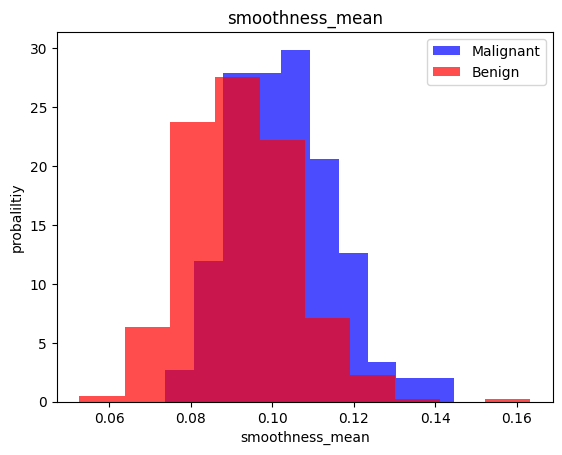

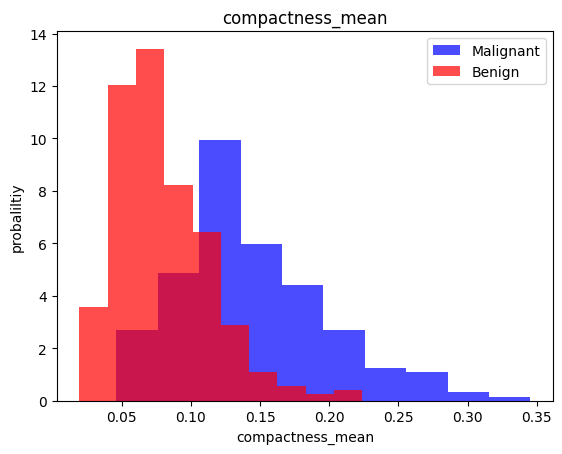

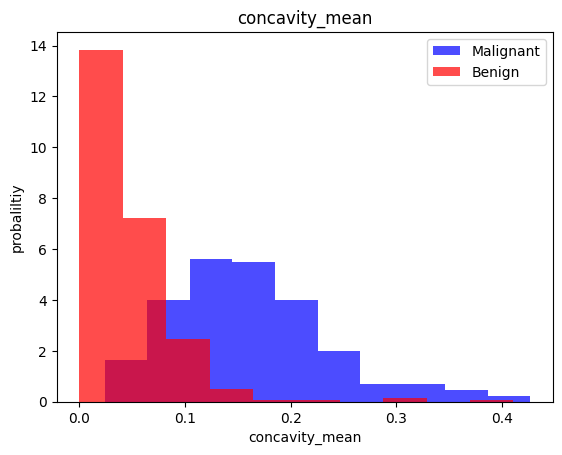

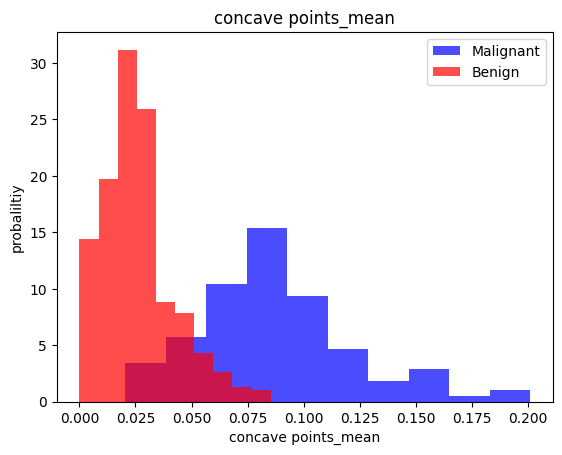

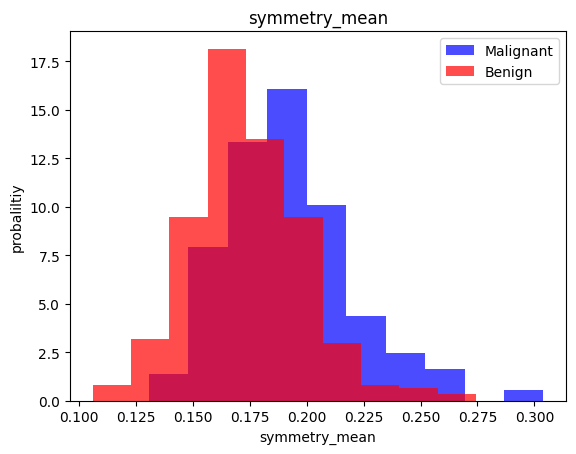

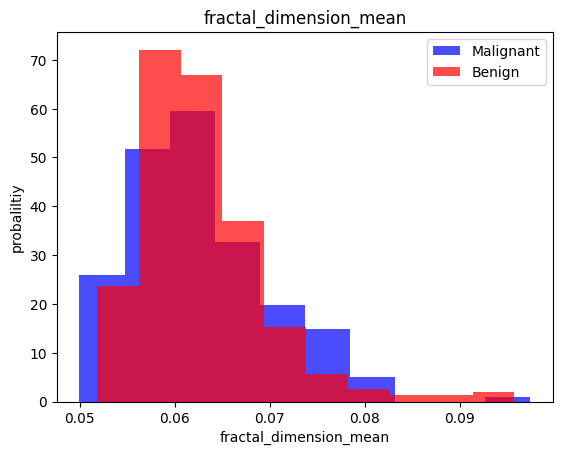

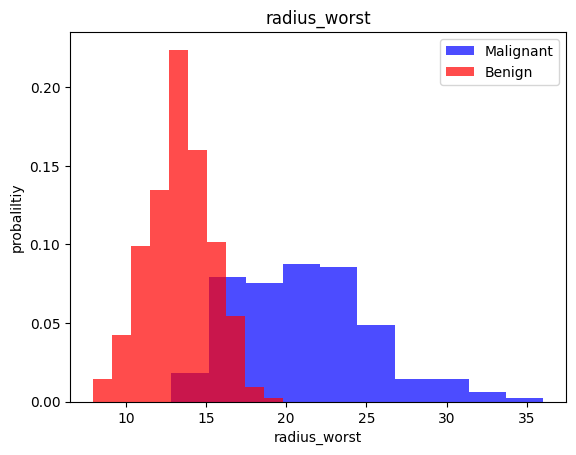

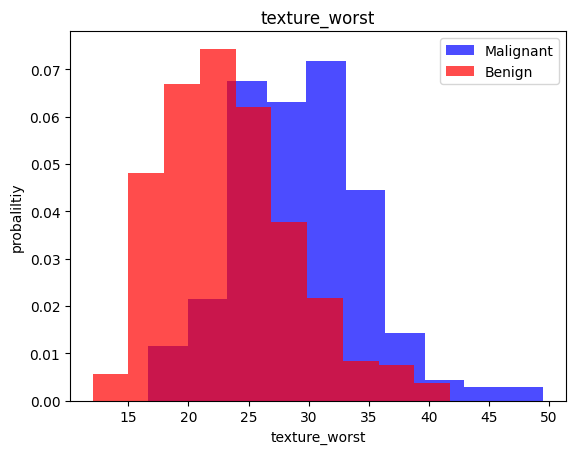

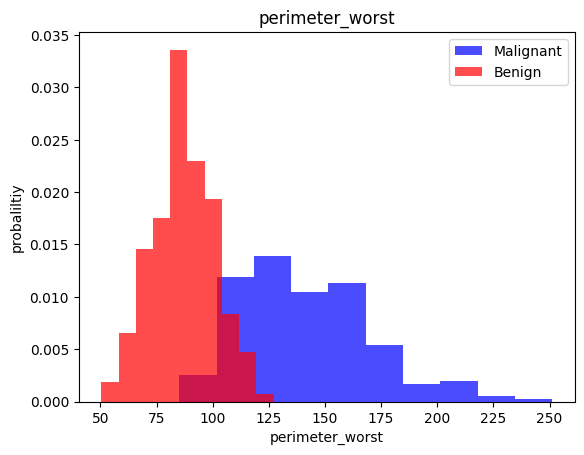

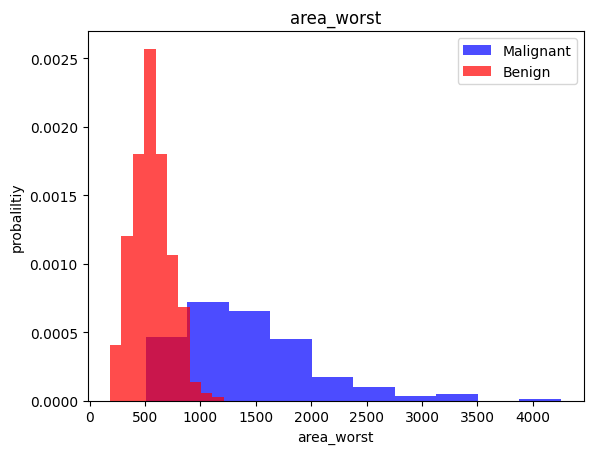

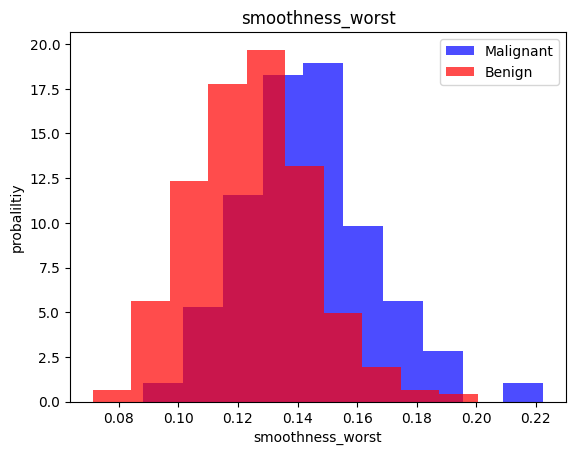

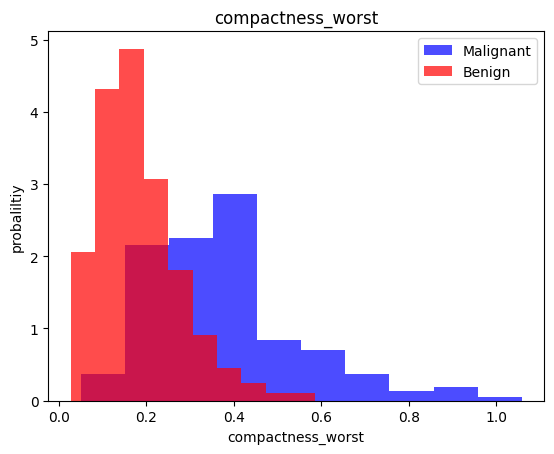

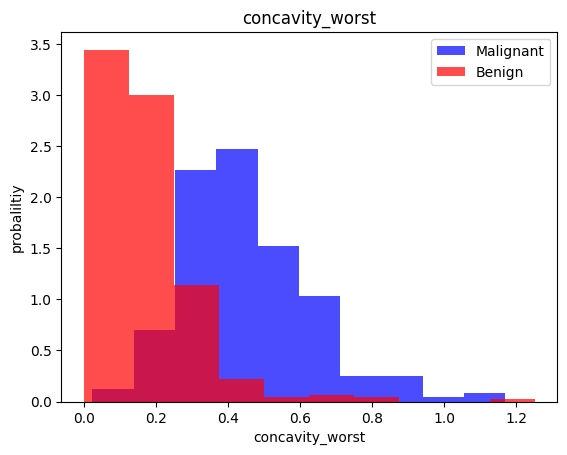

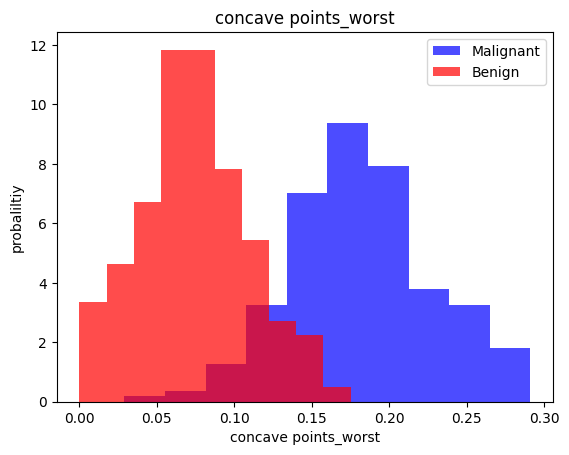

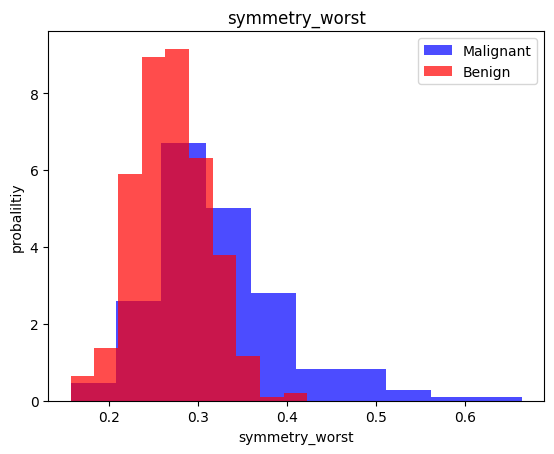

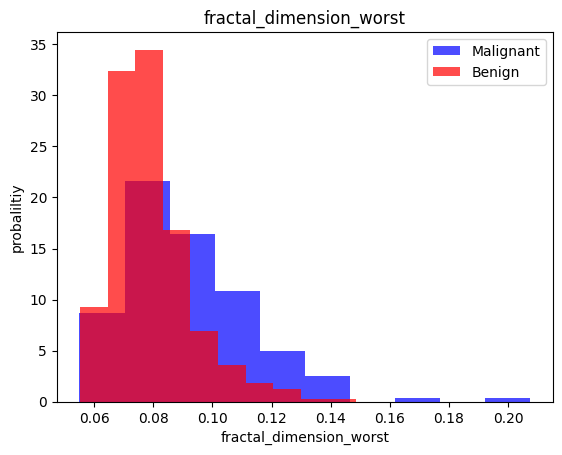

In [12]:
for label in df.columns[2:]:
  plt.hist(df[df["diagnosis"]==1][label], color='blue', label='Malignant', alpha=0.7, density = True)
  plt.hist(df[df["diagnosis"]==0][label], color='red', label='Benign', alpha=0.7, density = True)
  plt.title(label)
  plt.ylabel("probaliltiy")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [13]:
#We'll only use mean comparison for this
for col in cols:
  if re.search("_worst", col):
    df.drop(col, axis=1, inplace=True)

In [14]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


#Neural Net

In [15]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)

In [16]:
# Split data set
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [17]:
import copy

In [18]:
def get_xy(dataframe, y_label, x_labels=None):
  dataframe = copy.deepcopy(dataframe)
  if x_labels is None:
    X = dataframe[[c for c in dataframe.columns if c != y_label]].values
  else:
    if len(x_labels) == 1:
      X = dataframe[x_labels[0]].values.reshape(-1,1)
    else:
      X = dataframe[x_labels].values
      y = dataframe[y_label].values

  y = dataframe[y_label].values.reshape(-1,1)
  data = np.hstack((X, y))

  return data, X, y

In [19]:
_, X_train_all, y_train_all = get_xy(train, "diagnosis", x_labels=df.columns[2:])
_, X_val_all, y_val_all = get_xy(val, "diagnosis", x_labels=df.columns[2:])
_, X_test_all, y_test_all = get_xy(test, "diagnosis", x_labels=df.columns[2:])

In [20]:
df.shape

(569, 12)

In [21]:
all_normalizer = tf.keras.layers.Normalization(input_shape=(10,), axis=-1)
all_normalizer.adapt(X_train_all)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mean_squared_error',  metrics=['accuracy'])

In [23]:
history = nn_model.fit(
    X_train_all,
    y_train_all,
    epochs=50,
    batch_size=32,
    validation_data=(X_val_all, y_val_all),
    verbose = 0,
)

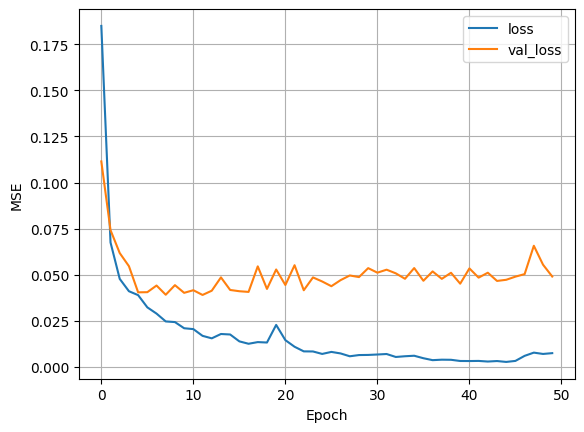

In [24]:
plot_loss(history)

In [36]:
#Testing Model Accuracy of the NN_model
loss, accuracy = nn_model.evaluate(X_test_all, y_test_all)
print(f"Test accuracy: {accuracy} , Test Loss: {loss}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9564 - loss: 0.0471 
Test accuracy: 0.9561403393745422 , Test Loss: 0.04957491159439087


In [41]:
random_stats = np.array([[20.29, 14.34, 135.10, 1297.0, 0.10030, 0.13280, 0.1980, 0.10430, 0.1809, 0.05883]])
result = nn_model.predict(random_stats)

if result >= 0.5:
    result = 1
else:
    result = 0

print(f"The actual answer is malignant, nn_model predicted {'malignant' if result == 1 else 'benign'}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
The actual answer is malignant, nn_model predicted malignant


#Conclusion
The neural network using the testing data set recieved a +95% accuracy. The feature vectors used were all averages of the dataset.
